In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
df = pd.read_excel(r"C:\Users\Yamin Hossain\Downloads\crop yeild data sheet - Copy.xlsx")
df

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230,80,28,80,24,20,12.0
1,480,60,36,70,20,18,8.0
2,1250,75,29,78,22,19,11.0
3,450,65,35,70,19,18,9.0
4,1200,80,27,79,22,19,11.0
...,...,...,...,...,...,...,...
94,1250,77,28,78,23,20,9.0
95,425,60,39,65,19,17,6.5
96,1220,79,28,77,23,21,10.5
97,480,65,36,68,21,16,7.0


EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     int64  
 1   Fertilizer      99 non-null     int64  
 2   Temperatue      99 non-null     int64  
 3   Nitrogen (N)    99 non-null     int64  
 4   Phosphorus (P)  99 non-null     int64  
 5   Potassium (K)   99 non-null     int64  
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 5.5 KB


In [18]:
df[df.duplicated()]

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
41,405,55,36,60,21,16,7.0
46,1275,76,26,75,24,19,11.0
76,1300,80,28,80,24,20,12.0
98,1230,80,28,80,24,20,12.0


In [19]:
df.describe()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,32.393939,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,5.426350,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,29.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,38.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


Correlation Analysis

In [20]:
df.corr()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
Rain Fall (mm),1.000000,0.890318,-0.967291,0.875808,0.776814,0.810893,0.886721
Fertilizer,0.890318,1.000000,-0.864742,0.909786,0.816710,0.762152,0.833823
Temperatue,-0.967291,-0.864742,1.000000,-0.846513,-0.780556,-0.779570,-0.892425
Nitrogen (N),0.875808,0.909786,-0.846513,1.000000,0.778651,0.808640,0.879056
Phosphorus (P),0.776814,0.816710,-0.780556,0.778651,1.000000,0.748642,0.800094
Potassium (K),0.810893,0.762152,-0.779570,0.808640,0.748642,1.000000,0.856010
Yeild (Q/acre),0.886721,0.833823,-0.892425,0.879056,0.800094,0.856010,1.000000


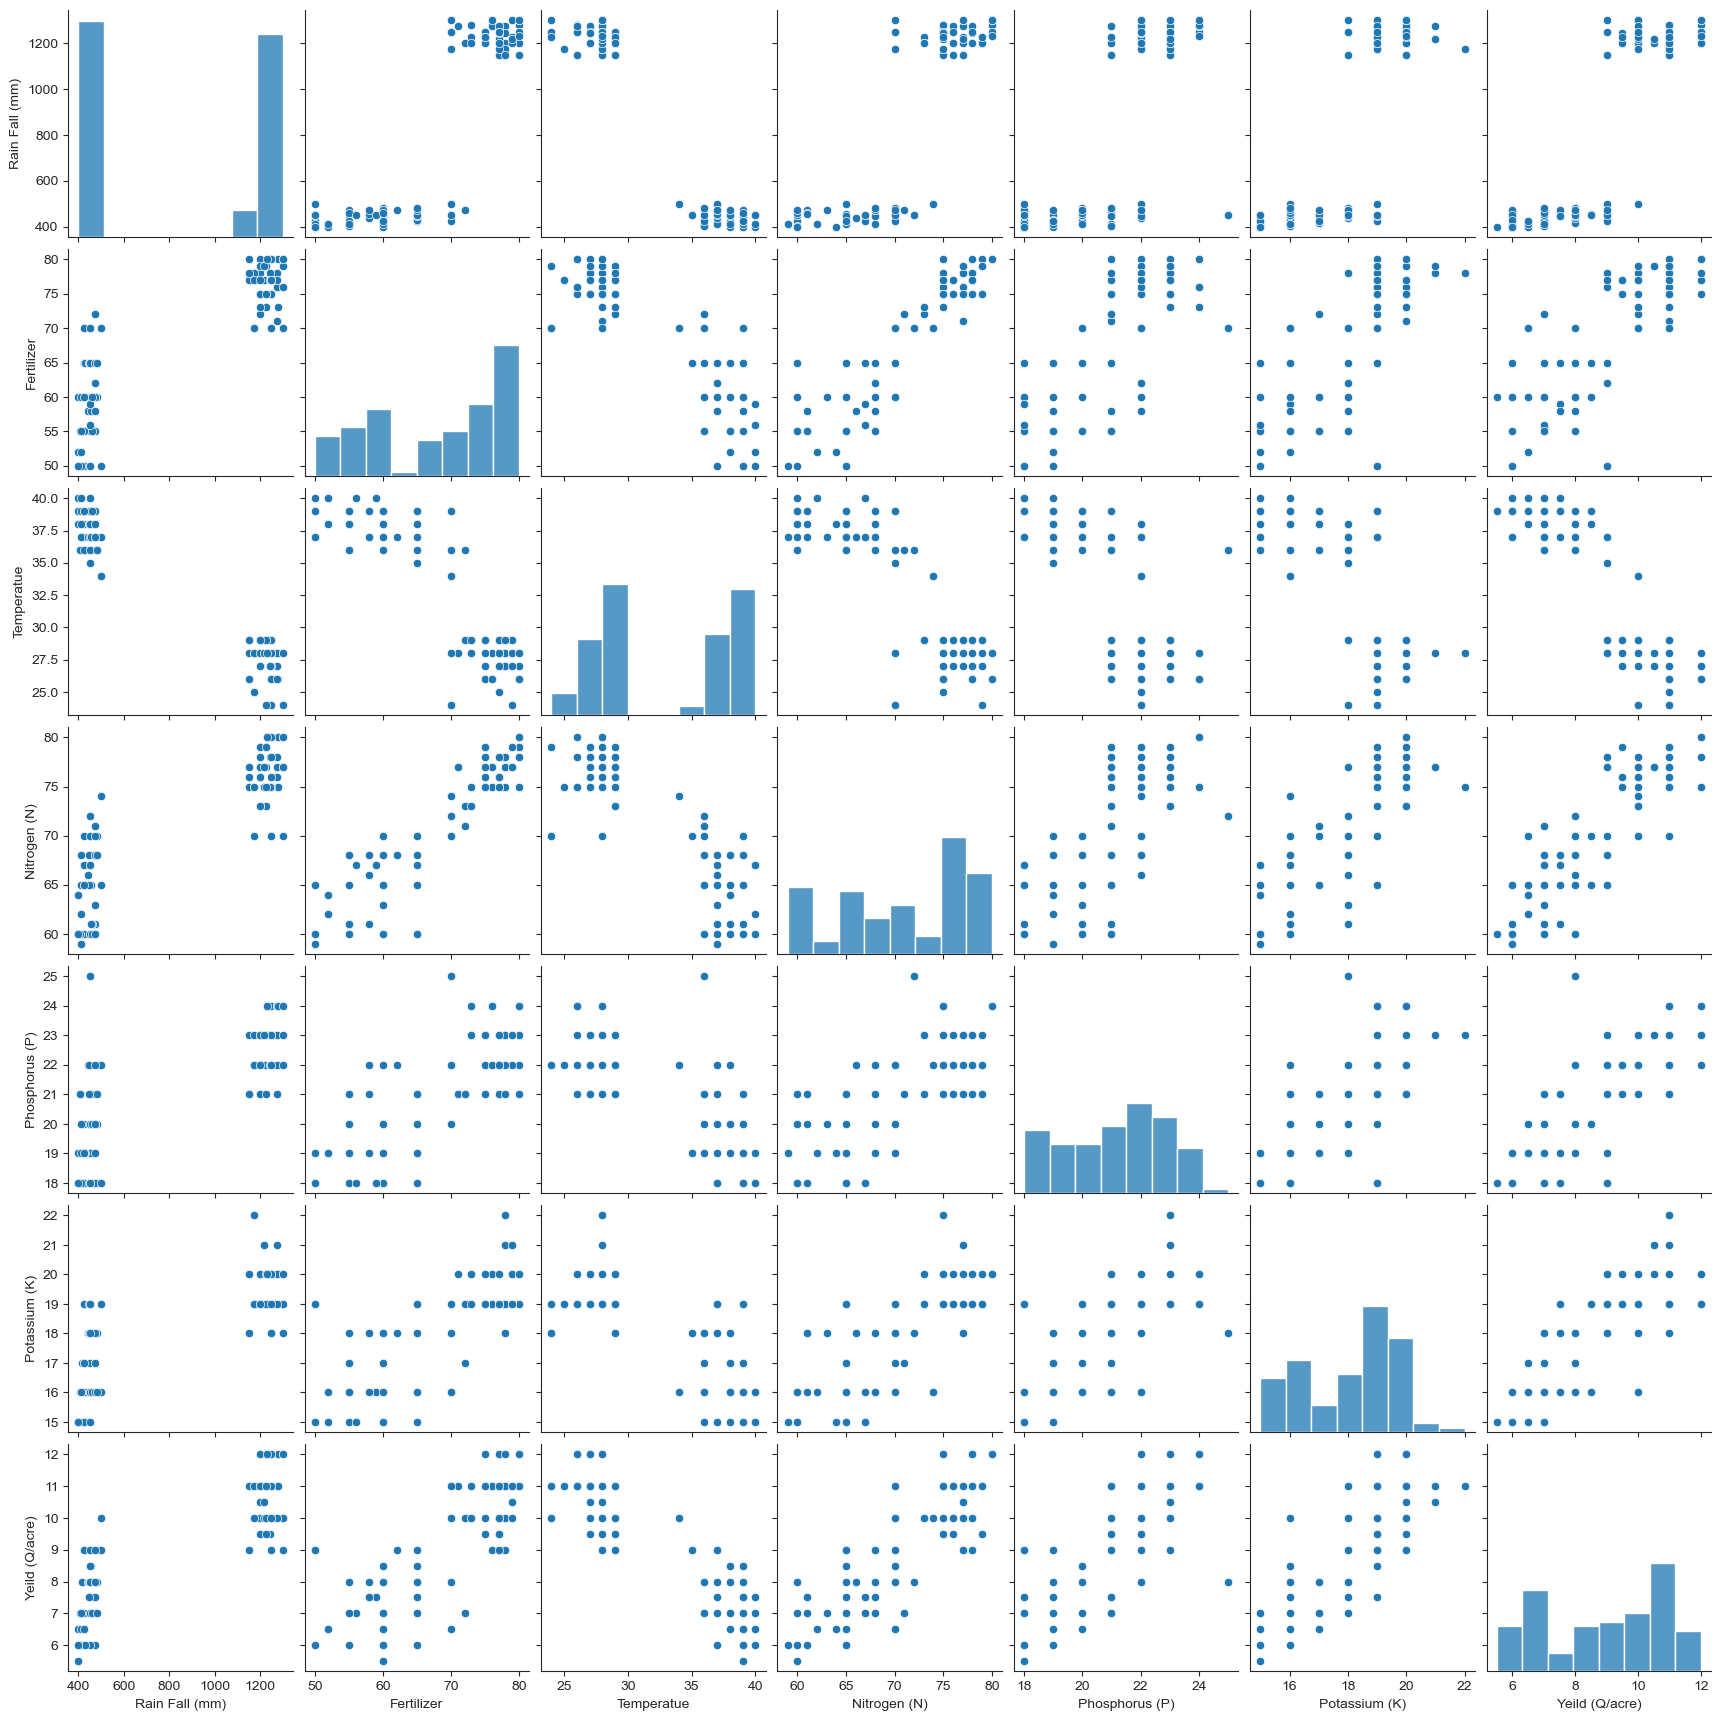

In [22]:
sns.set_style(style='ticks')
sns.pairplot(df1)

Model Building

In [26]:
df1=df.rename({'Rain Fall (mm)':'RF','Fertilizer':'F','Temperatue':'T','Nitrogen (N)':'N','Phosphorus (P)':'P','Potassium (K)':'K','Yeild (Q/acre)':'Y'},axis=1)
df1

,RF,F,T,N,P,K,Y
0,1230,80,28,80,24,20,12.0
1,480,60,36,70,20,18,8.0
2,1250,75,29,78,22,19,11.0
3,450,65,35,70,19,18,9.0
4,1200,80,27,79,22,19,11.0
...,...,...,...,...,...,...,...
94,1250,77,28,78,23,20,9.0
95,425,60,39,65,19,17,6.5
96,1220,79,28,77,23,21,10.5
97,480,65,36,68,21,16,7.0


In [39]:
model=smf.ols("RF~F+T+N+P+K+Y",data=df1).fit()

Model Tesing

In [41]:
#Coefficient parameters
model.params

Intercept    1732.603538
F               6.169151
T             -55.691365
N               5.211958
P             -11.412442
K              25.710158
Y              -9.825143
dtype: float64

In [42]:
#tvalues and pvalues
model.tvalues, np.round(model.pvalues,5)

(Intercept     5.531035
 F             2.400141
 T           -13.196337
 N             1.338835
 P            -1.301775
 K             2.573435
 Y            -0.726315
 dtype: float64,
 Intercept    0.00000
 F            0.01840
 T            0.00000
 N            0.18392
 P            0.19624
 K            0.01167
 Y            0.46949
 dtype: float64)

In [43]:
#rsquared values
model.rsquared,model.rsquared_adj

(0.9532266693886996, 0.9501762347836148)

In [44]:
slr_f = smf.ols("RF~F",data=df1).fit()
slr_f.tvalues , slr_f.pvalues

(Intercept   -12.329357
 F            19.257298
 dtype: float64,
 Intercept    1.423985e-21
 F            6.535790e-35
 dtype: float64)

In [45]:
slr_t = smf.ols("RF~T",data=df1).fit()
slr_t.tvalues , slr_t.pvalues

(Intercept    50.671953
 T           -37.555334
 dtype: float64,
 Intercept    1.349668e-71
 T            1.367351e-59
 dtype: float64)

In [46]:
slr_n = smf.ols("RF~N",data=df1).fit()
slr_n.tvalues , slr_n.pvalues

(Intercept   -13.719244
 N            17.871199
 dtype: float64,
 Intercept    1.895979e-24
 N            1.891847e-32
 dtype: float64)

In [47]:
slr_p = smf.ols("RF~P",data=df1).fit()
slr_p.tvalues , slr_p.pvalues

(Intercept    -9.042633
 P            12.149234
 dtype: float64,
 Intercept    1.564801e-14
 P            3.405944e-21
 dtype: float64)

In [48]:
slr_k = smf.ols("RF~K",data=df1).fit()
slr_k.tvalues , slr_k.pvalues

(Intercept   -10.000072
 K            13.647370
 dtype: float64,
 Intercept    1.340210e-16
 K            2.656753e-24
 dtype: float64)

In [49]:
slr_y = smf.ols("RF~Y",data=df1).fit()
slr_y.tvalues , slr_y.pvalues

(Intercept    -8.856054
 Y            18.890571
 dtype: float64,
 Intercept    3.948258e-14
 Y            2.860705e-34
 dtype: float64)

In [50]:
mlr_ft = smf.ols("RF~F+T",data=df1).fit()
mlr_ft.tvalues , mlr_ft.pvalues

(Intercept     9.310472
 F             4.570941
 T           -16.752124
 dtype: float64,
 Intercept    4.508853e-15
 F            1.446153e-05
 T            2.998890e-30
 dtype: float64)

In [51]:
mlr_np = smf.ols("RF~N+P",data=df1).fit()
mlr_np.tvalues , mlr_np.pvalues

(Intercept   -14.570992
 N             9.230194
 P             3.231804
 dtype: float64,
 Intercept    4.635060e-26
 N            6.706690e-15
 P            1.685952e-03
 dtype: float64)

In [52]:
mlr_ky = smf.ols("RF~K+Y",data=df1).fit()
mlr_ky.tvalues , mlr_ky.pvalues

(Intercept   -5.412607
 K            2.177579
 Y            8.088204
 dtype: float64,
 Intercept    4.567993e-07
 K            3.188795e-02
 Y            1.848024e-12
 dtype: float64)

In [53]:
mlr_ftn = smf.ols("RF~F+T+N",data=df1).fit()
mlr_ftn.tvalues , mlr_ftn.pvalues

(Intercept     6.362091
 F             2.093621
 T           -15.727278
 N             2.073590
 dtype: float64,
 Intercept    6.961388e-09
 F            3.895737e-02
 T            3.431679e-28
 N            4.082375e-02
 dtype: float64)

In [54]:
mlr_pky = smf.ols("RF~P+K+Y",data=df1).fit()
mlr_pky.tvalues , mlr_pky.pvalues

(Intercept   -5.614926
 P            2.067873
 K            1.742003
 Y            6.322424
 dtype: float64,
 Intercept    1.946234e-07
 P            4.137029e-02
 K            8.474453e-02
 Y            8.341478e-09
 dtype: float64)

In [56]:
mlr_ftnpky = smf.ols("RF~F+T+N+P+K+Y",data=df1).fit()
mlr_ftnpky.tvalues , mlr_ftnpky.pvalues

(Intercept     5.531035
 F             2.400141
 T           -13.196337
 N             1.338835
 P            -1.301775
 K             2.573435
 Y            -0.726315
 dtype: float64,
 Intercept    2.966680e-07
 F            1.840290e-02
 T            6.130379e-23
 N            1.839232e-01
 P            1.962433e-01
 K            1.166821e-02
 Y            4.694894e-01
 dtype: float64)

Model Validation

Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
df = pd.read_excel(r"C:\Users\Yamin Hossain\Downloads\crop yeild data sheet - Copy.xlsx")
df1=df.rename({'Rain Fall (mm)':'RF','Fertilizer':'F','Temperatue':'T','Nitrogen (N)':'N','Phosphorus (P)':'P','Potassium (K)':'K','Yeild (Q/acre)':'Y'},axis=1)
rsq_rf =smf.ols("RF~F+T+N+P+K+Y", data=df1).fit().rsquared
vif_rf = 1/(1-rsq_rf)
rsq_f =smf.ols("F~RF+T+N+P+K+Y", data=df1).fit().rsquared
vif_f = 1/(1-rsq_f)
rsq_t =smf.ols("T~RF+F+N+P+K+Y", data=df1).fit().rsquared
vif_t = 1/(1-rsq_t)
rsq_n =smf.ols("N~RF+F+T+P+K+Y", data=df1).fit().rsquared
vif_n = 1/(1-rsq_n)
rsq_p =smf.ols("P~RF+F+T+N+K+Y", data=df1).fit().rsquared
vif_p = 1/(1-rsq_p)
rsq_k =smf.ols("K~RF+F+T+N+P+Y", data=df1).fit().rsquared
vif_k = 1/(1-rsq_k)
rsq_y =smf.ols("Y~RF+F+T+N+P+K", data=df1).fit().rsquared
vif_y = 1/(1-rsq_y)
d1 = {'Variables':['RF','F','T','N','P','K','Y'],'Vif':[vif_rf,vif_f,vif_t,vif_n,vif_p,vif_k,vif_y]}
Vif_df = pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RF,21.379705
1,F,8.677142
2,T,18.646146
3,N,8.465989
4,P,3.664481
5,K,4.342900
6,Y,8.742007


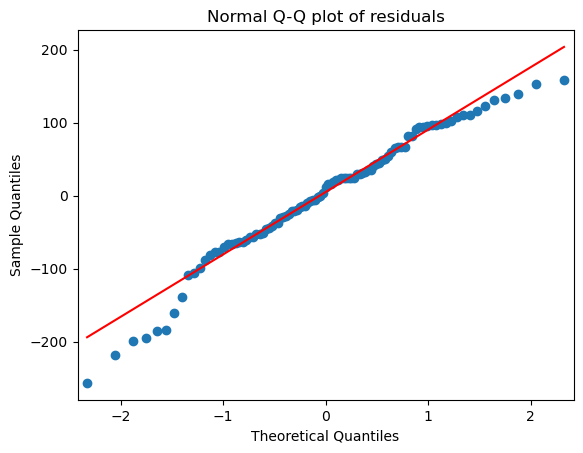

In [11]:
model=smf.ols("RF~F+T+N+P+K+Y",data=df1).fit()
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

eval_env: 1


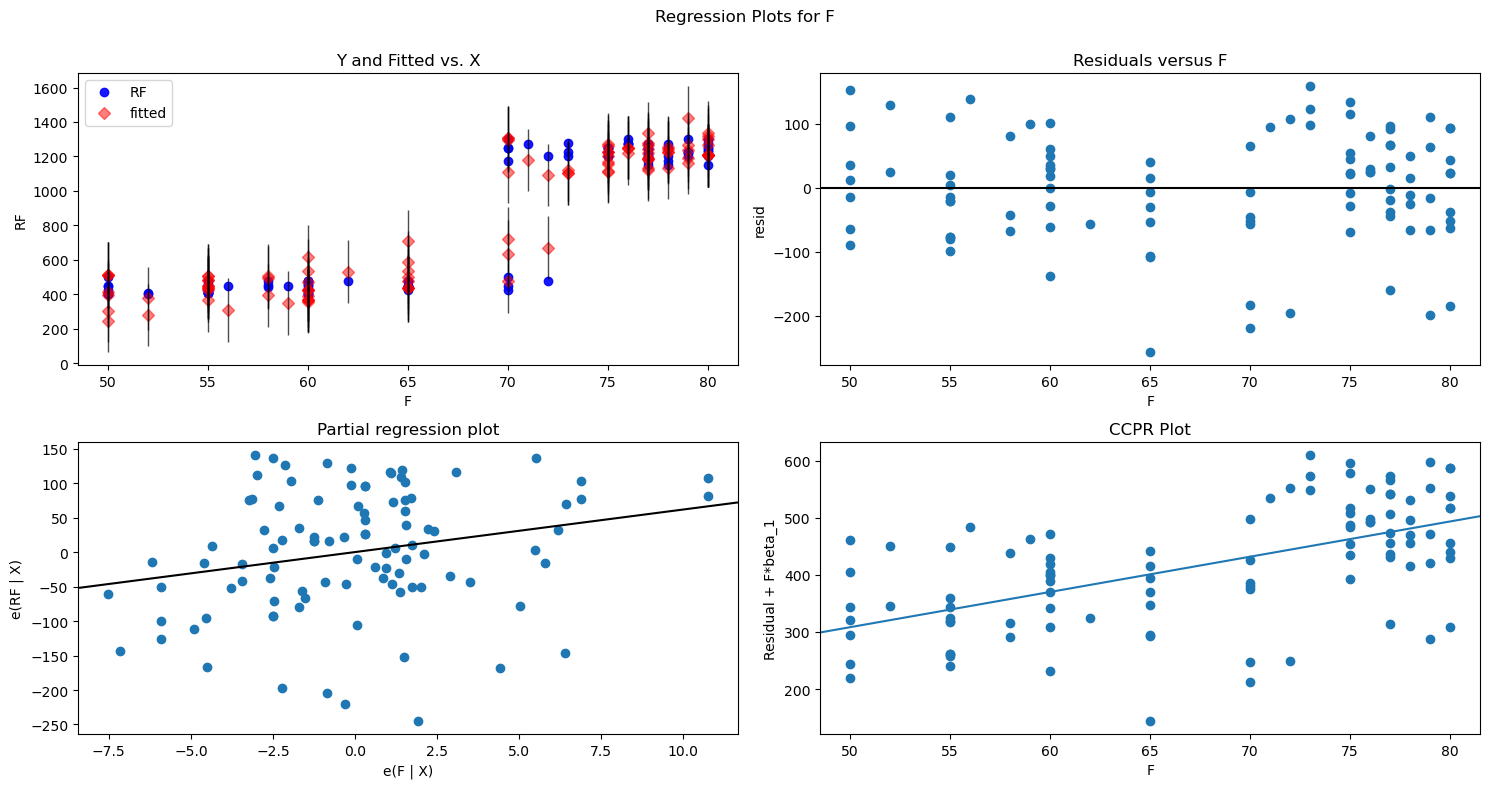

In [15]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'F',fig=fig)
plt.show()

eval_env: 1


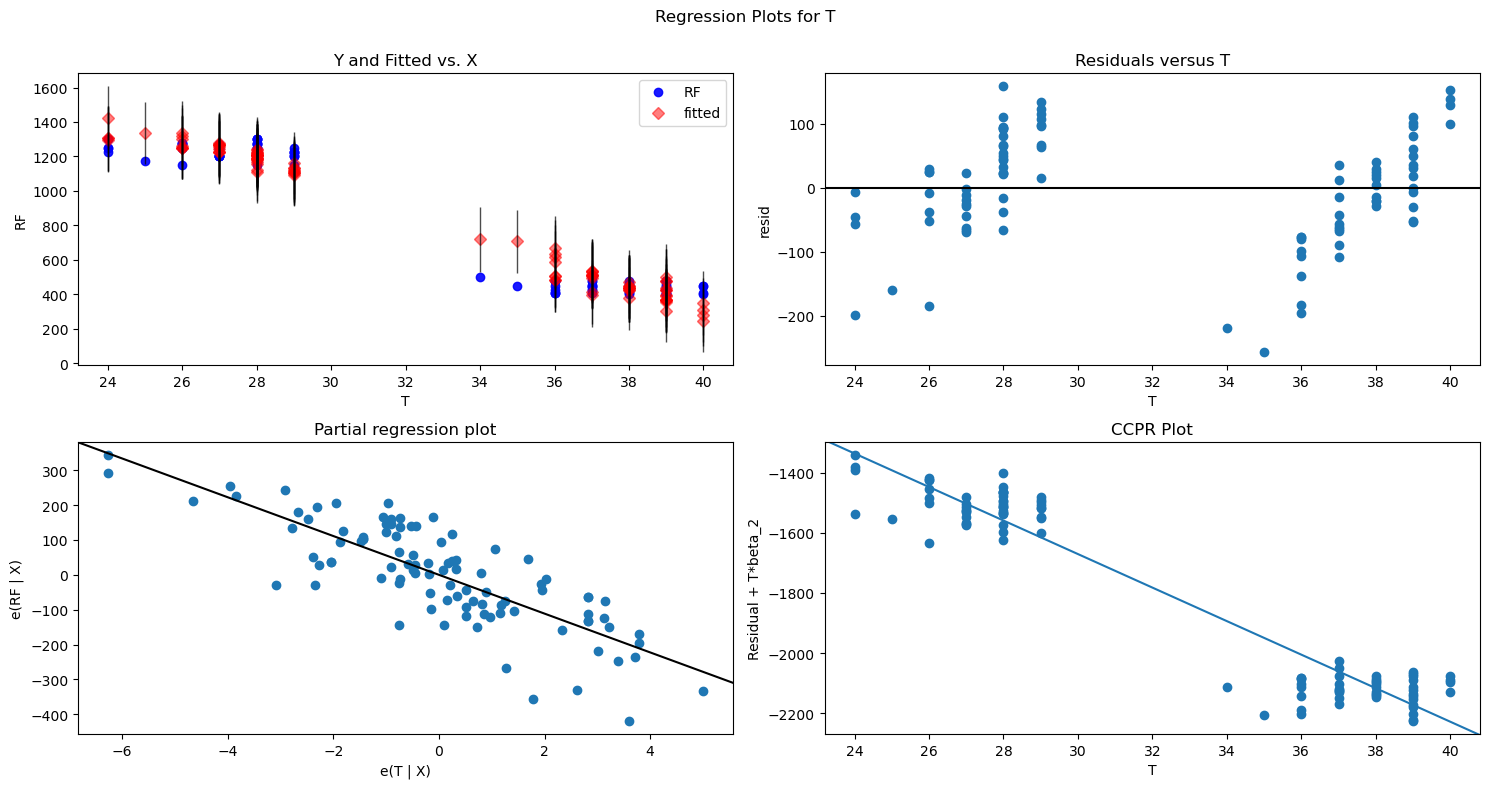

In [16]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'T',fig=fig)
plt.show()

eval_env: 1


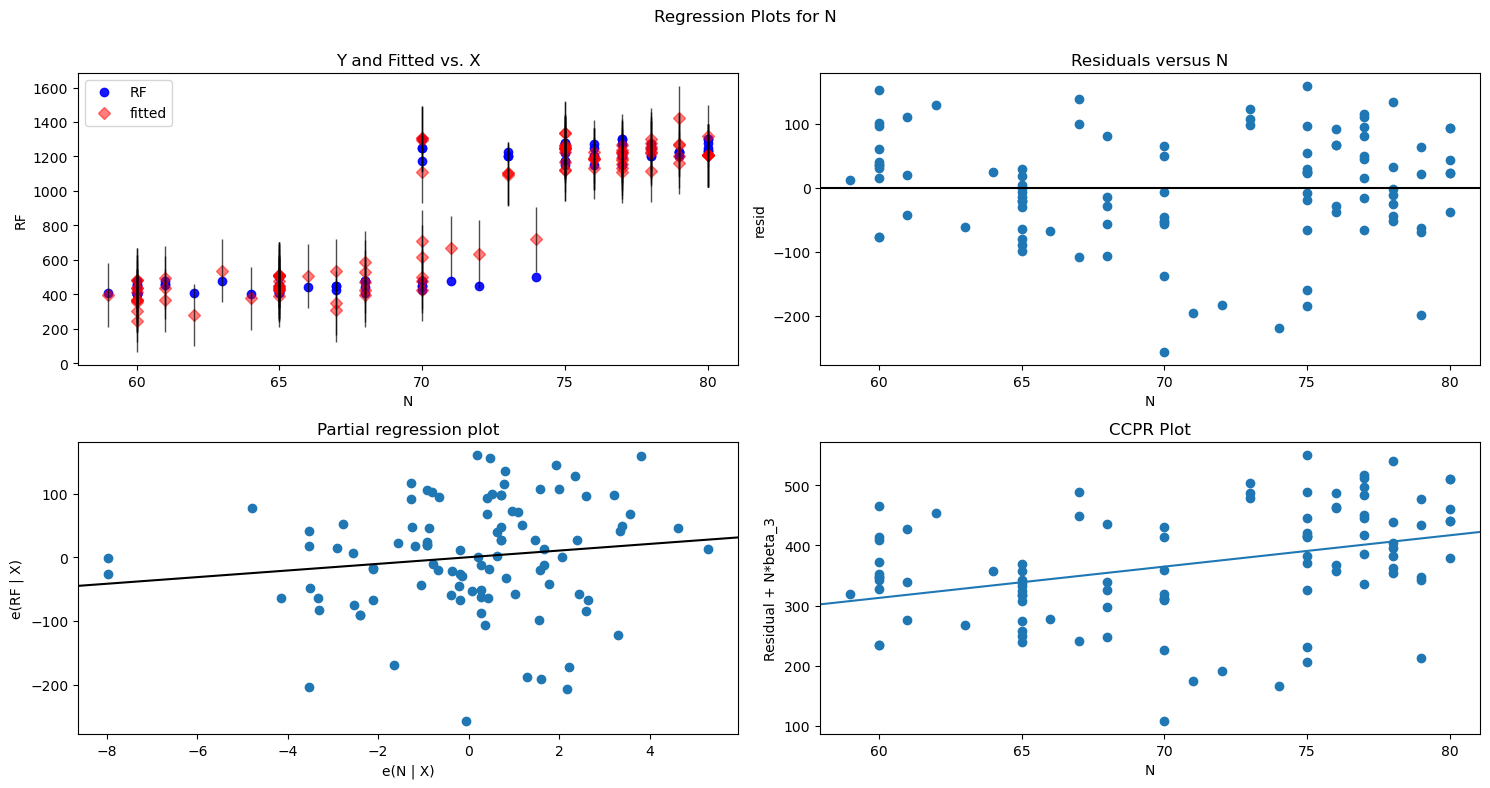

In [17]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'N',fig=fig)
plt.show()

eval_env: 1


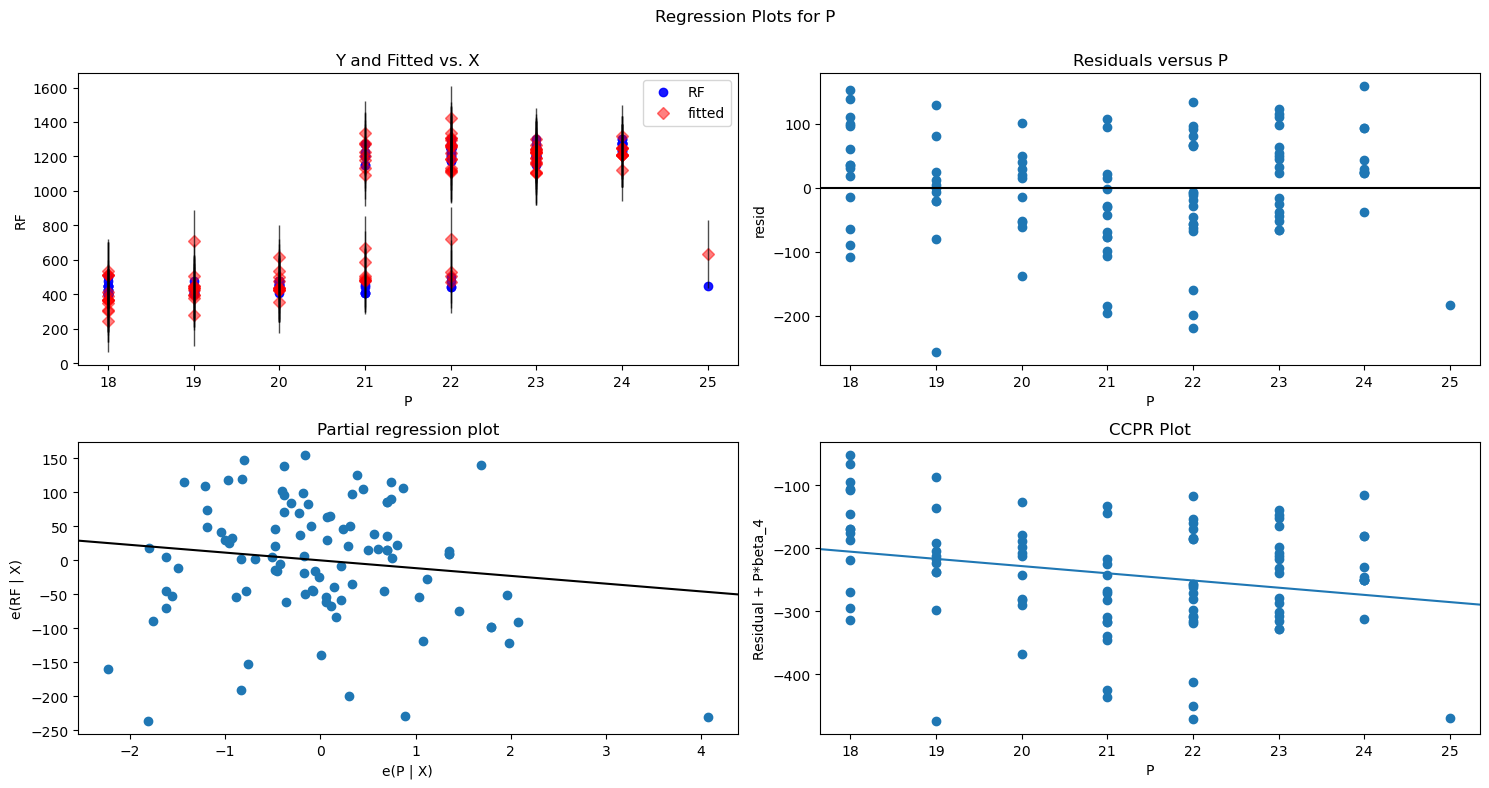

In [18]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'P',fig=fig)
plt.show()

eval_env: 1


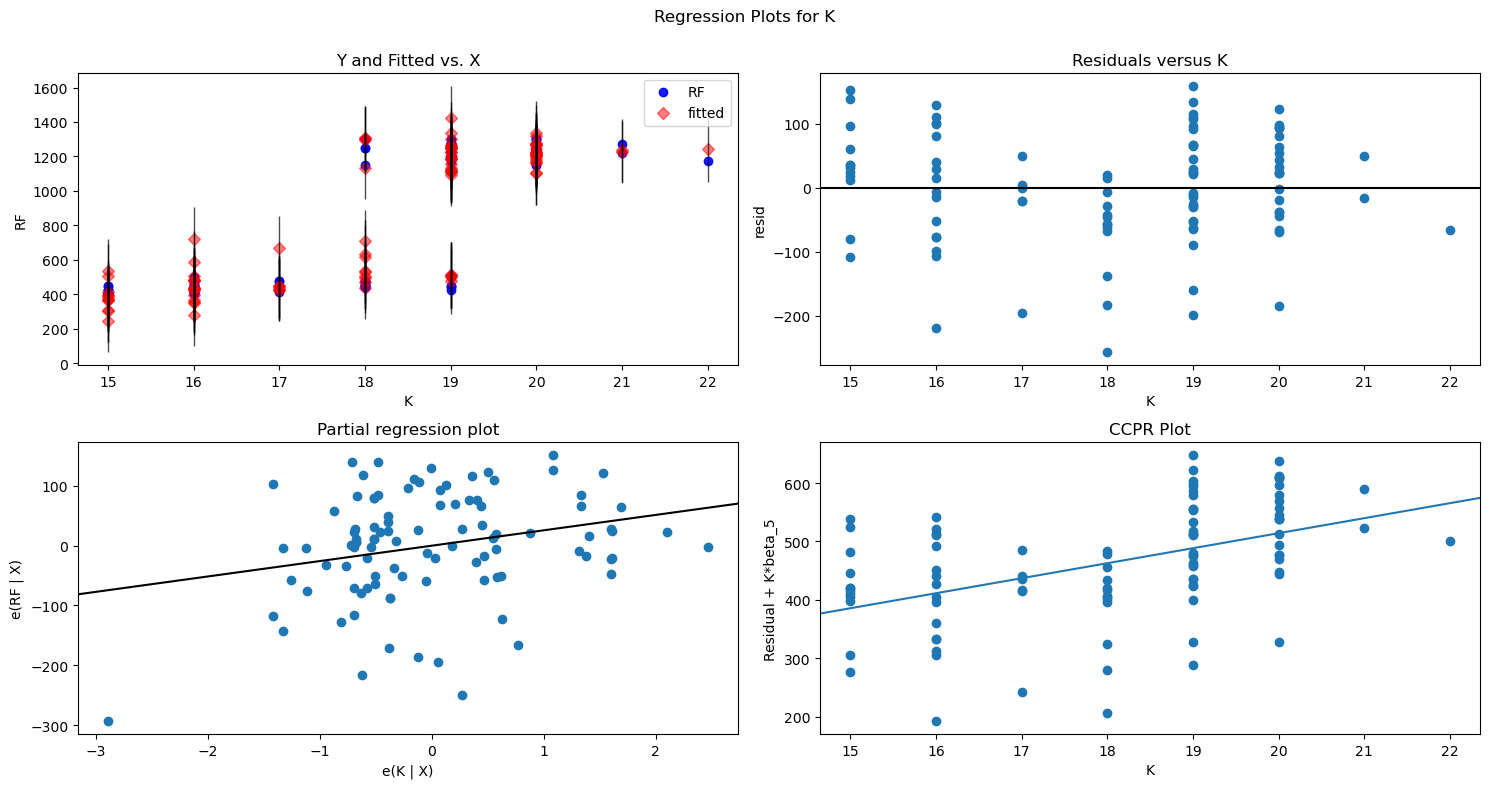

In [19]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'K',fig=fig)
plt.show()

eval_env: 1


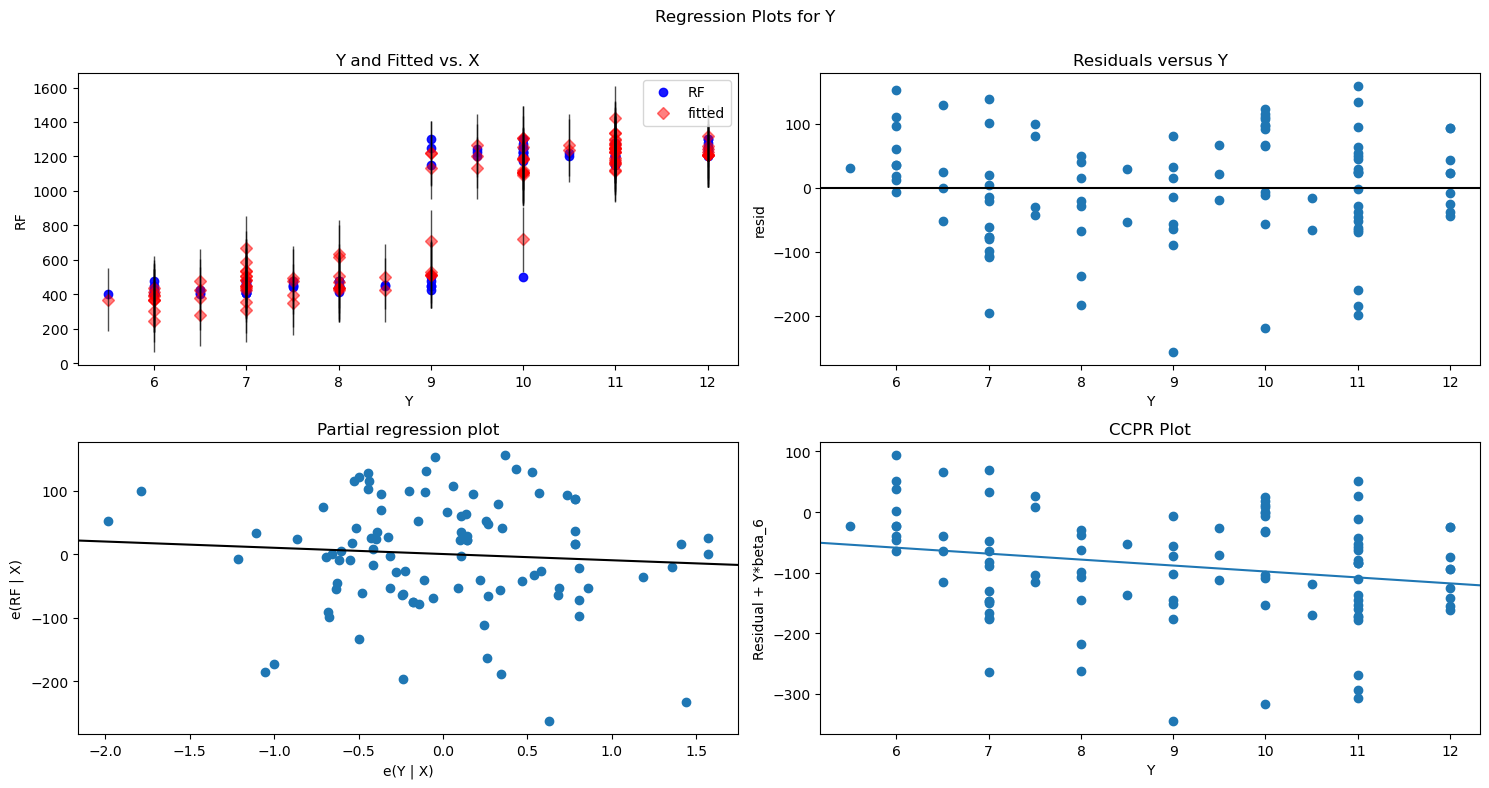

In [20]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Y',fig=fig)
plt.show()

Model Deletion Diagnostics(checking Outliers or Influencers)
Two Techniques : 1.Cook's Distance & 2.Leverage Value

In [21]:
(c,_) = model.get_influence().cooks_distance
c

array([6.63596292e-04, 1.77134325e-02, 1.27183791e-02, 6.86930504e-02,
       3.28881046e-03, 1.76785553e-01, 1.05844025e-02, 2.48929758e-02,
       1.57010818e-03, 1.02833317e-02, 1.13928579e-03, 3.64542228e-04,
       2.85180219e-03, 3.39136529e-02, 6.60697396e-03, 1.76337889e-03,
       1.02668949e-02, 1.82379818e-02, 6.87901850e-04, 7.52420294e-04,
       2.70082636e-04, 8.48589829e-04, 3.23632930e-04, 1.16702534e-02,
       1.75216524e-02, 8.89408929e-03, 2.27750924e-03, 2.24206563e-03,
       1.10336242e-02, 5.45183703e-03, 7.05330069e-02, 1.08831910e-02,
       5.82045786e-04, 1.26553337e-05, 7.41325923e-03, 8.29148446e-04,
       1.06576269e-04, 6.65898225e-03, 9.39170892e-05, 7.12580847e-03,
       2.23244572e-03, 1.10336242e-02, 1.05392053e-02, 4.99359823e-04,
       1.73049579e-03, 6.89054240e-04, 5.82045786e-04, 1.36378111e-03,
       4.19784229e-03, 2.16935850e-03, 4.87559513e-02, 5.90416110e-05,
       4.26958919e-06, 9.32662810e-04, 9.69068861e-05, 3.24647841e-03,
      

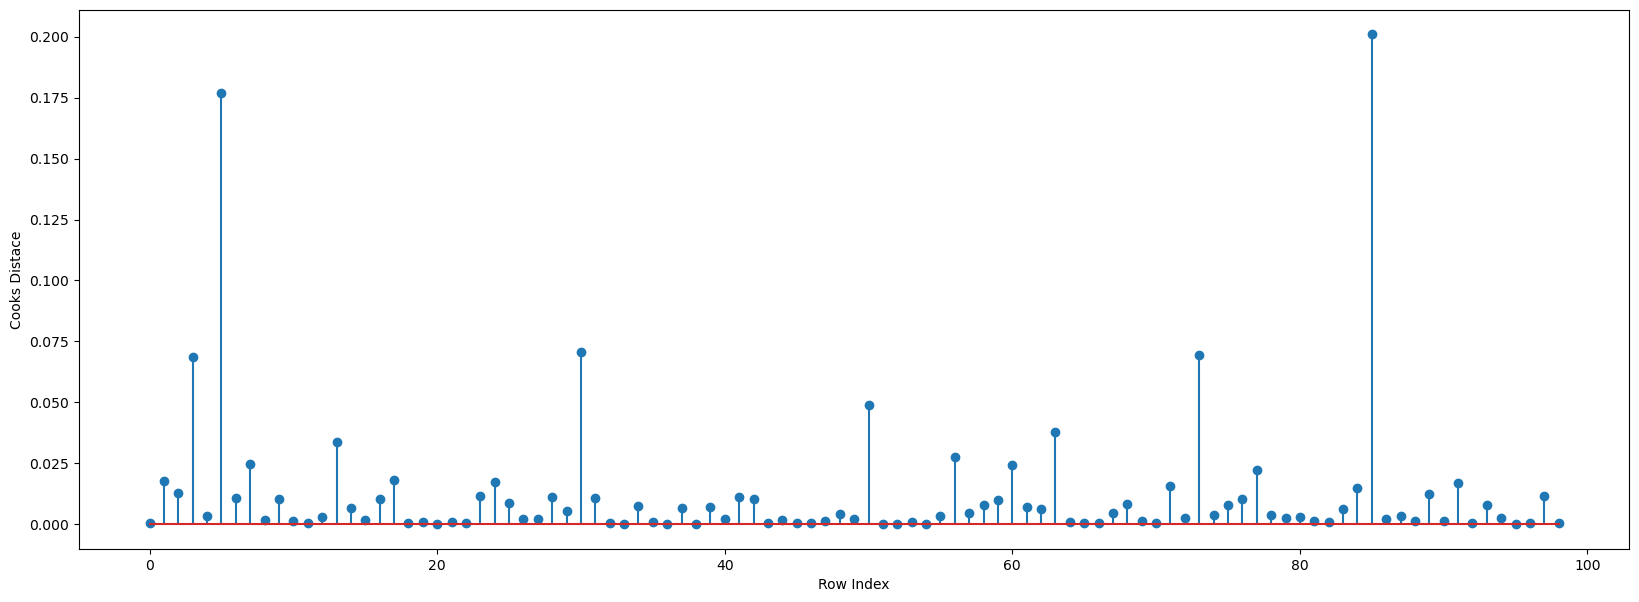

In [23]:
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distace')
plt.show()

In [24]:
np.argmax(c) , np.max(c)

(85, 0.20101465080434042)

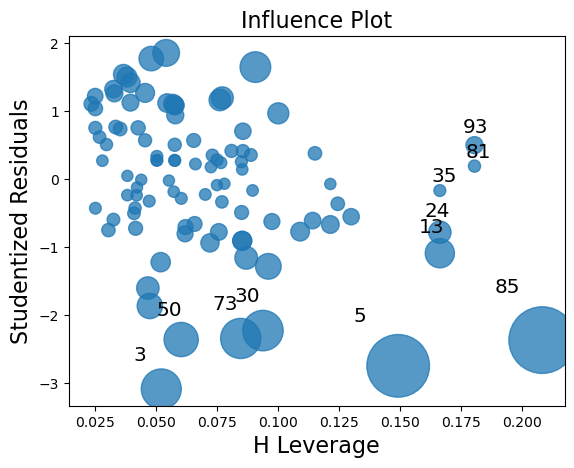

In [25]:
influence_plot(model)
plt.show()

In [26]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.24242424242424243

In [27]:
df1[df1.index.isin([49])] 

,RF,F,T,N,P,K,Y
49,450,50,37,60,18,15,6.0


Improvinng the Model

In [29]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df2=df1.drop(df1.index[[49]],axis=0).reset_index(drop=True)
df2

,RF,F,T,N,P,K,Y
0,1230,80,28,80,24,20,12.0
1,480,60,36,70,20,18,8.0
2,1250,75,29,78,22,19,11.0
3,450,65,35,70,19,18,9.0
4,1200,80,27,79,22,19,11.0
...,...,...,...,...,...,...,...
93,1250,77,28,78,23,20,9.0
94,425,60,39,65,19,17,6.5
95,1220,79,28,77,23,21,10.5
96,480,65,36,68,21,16,7.0


Model Deletion Diagnostics and Final Model

In [30]:
while np.max(c)>0.5 :
    model=smf.ols("RF~F+T+N+P+K+Y",data=df2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df2=df2.drop(df2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df2
else:
    final_model=smf.ols("RF~F+T+N+P+K+Y",data=df2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)



Thus model accuracy is improved to 0.9528285725745579


In [31]:
final_model.rsquared

0.9528285725745579

In [32]:
df2

,RF,F,T,N,P,K,Y
0,1230,80,28,80,24,20,12.0
1,480,60,36,70,20,18,8.0
2,1250,75,29,78,22,19,11.0
3,450,65,35,70,19,18,9.0
4,1200,80,27,79,22,19,11.0
...,...,...,...,...,...,...,...
93,1250,77,28,78,23,20,9.0
94,425,60,39,65,19,17,6.5
95,1220,79,28,77,23,21,10.5
96,480,65,36,68,21,16,7.0


Model Predictions

In [33]:
new_df=pd.DataFrame({'F':70,'T':30,'N':75,'P':15,'K':25,'Y':9.5},index=[0])
new_df

,F,T,N,P,K,Y
0,70,30,75,15,25,9.5


In [34]:
# Manual Prediction of Rain Fall
final_model.predict(new_df)

0    1263.021339
dtype: float64

In [36]:
# Automatic Prediction of Rain fall with 90.02% accurcy
pred_y=final_model.predict(df2)
pred_y

0     1207.527026
1      617.837790
2     1116.404263
3      706.697623
4     1263.811984
         ...     
93    1217.706007
94     425.409604
95    1237.042305
96     585.210151
97    1207.527026
Length: 98, dtype: float64

table containing R^2 value for each prepared model

In [37]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.953227
1,Final_Model,0.952829
